In [1]:
import numpy as np
import setigen as stg
from blimpy import Waterfall
import matplotlib.pyplot as plt
import random
from astropy import units as u
from tqdm import tqdm

num_classes = 100
num_samples_per_class = 100


In [2]:
import os

directory = os.fsencode( "../../../../../datax/scratch/pma/reverse_search/test/")
count = 0
data = []
for folder in os.listdir(directory):
    print(folder)
    for subfolder in os.listdir(directory+folder):
        back = os.fsencode( "/")
        for file in os.listdir(directory+folder+back+subfolder):
            file_directory = str(os.path.join(directory+folder+back+subfolder, file)).replace('b', '').replace("'","")
            if 'filtered.npy' in file_directory:
                data.append(np.load(str(file_directory)))
                count += 1
data = np.vstack(data)
print(data.shape)

b'HIP104887-1850'
b'HIP87579-1008'
b'clustering_tests'
(347064, 16, 256)


In [3]:
def painting(data):
    all_data = []
    labels = []
    for c in tqdm(range(num_classes)):
        drift = 2*random.random()*(-1)**random.randint(0,2)
        snr = random.randint(100, 150)
        width = random.randint(20, 50)
        for s in range(num_samples_per_class):
            index = random.randint(0, data.shape[0]-1)
            window = data[index, :,:]
            
            start = random.randint(50, 180)
            
            frame = stg.Frame.from_data(df=2.7939677238464355*u.Hz,
                                        dt=18.253611008*u.s,
                                        fch1=1289*u.MHz,
                                        ascending=True,
                                        data=window)
            frame.add_signal(stg.constant_path(
                                        f_start=frame.get_frequency(index=start),
                                       drift_rate=drift*u.Hz/u.s),
                                      stg.constant_t_profile(level=frame.get_intensity(snr=snr)),
                                      stg.gaussian_f_profile(width=width*u.Hz),
                                      stg.constant_bp_profile(level=1))
            all_data.append(frame.data)
            labels.append(c)
    all_data = np.array(all_data)
    labels = np.vstack(labels)
    return all_data, labels

In [4]:
def normalize(data):
    epsilon = 1
    min_val = data.min()
    data = data - min_val + epsilon
    new_data = np.log(data)
    min_val = data.min()
    max_val = data.max()
    final_data = (data - min_val) / (max_val - min_val)
    return final_data
    
def normalize_data(data):
    for i in tqdm(range(data.shape[0])):
        data[i,:,:] = normalize(data[i,:,:, :])
    return data

In [5]:
injected, labels = painting(data)
input_data = normalize_data(np.expand_dims(injected, axis = -1))
np.save( "../../../../../datax/scratch/pma/reverse_search/test/clustering_tests/clustering_hyperparam_test.npy", input_data)
np.save( "../../../../../datax/scratch/pma/reverse_search/test/clustering_tests/clustering_hyperparam_test_labels.npy", labels)

100%|████████████████████████████████| 10000/10000 [00:00<00:00, 10877.69it/s]


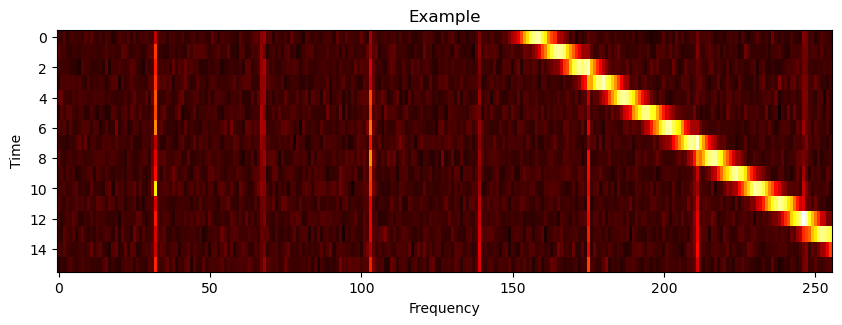

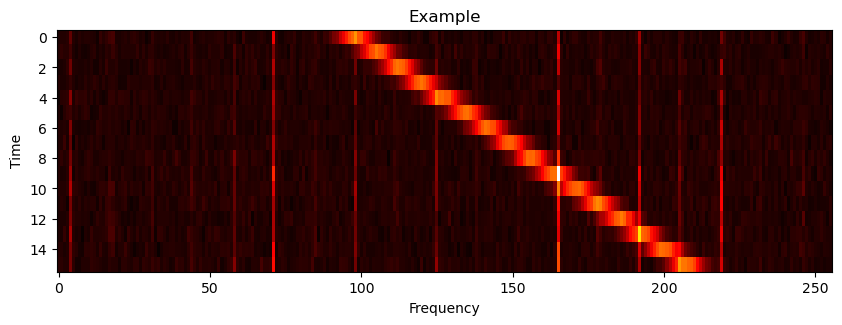

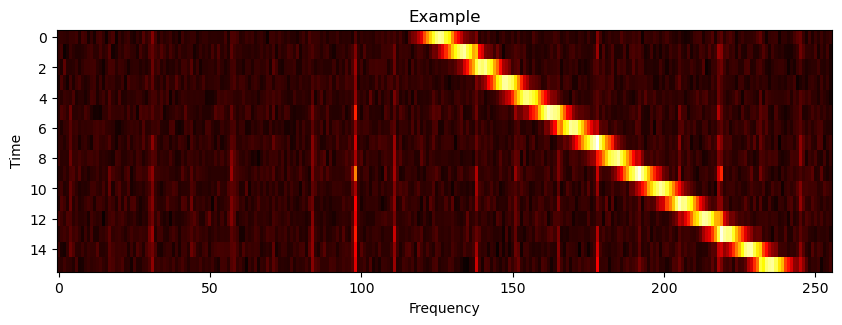

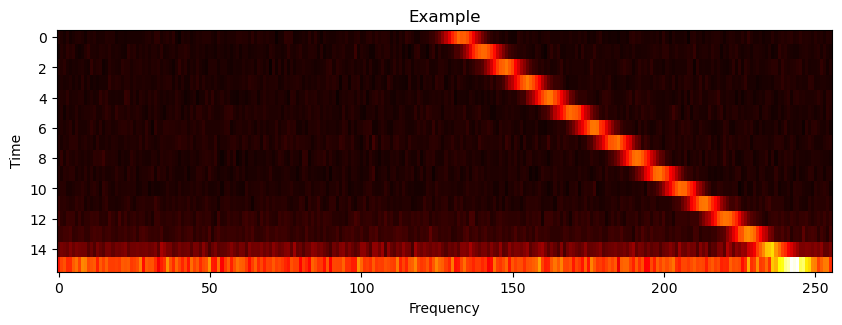

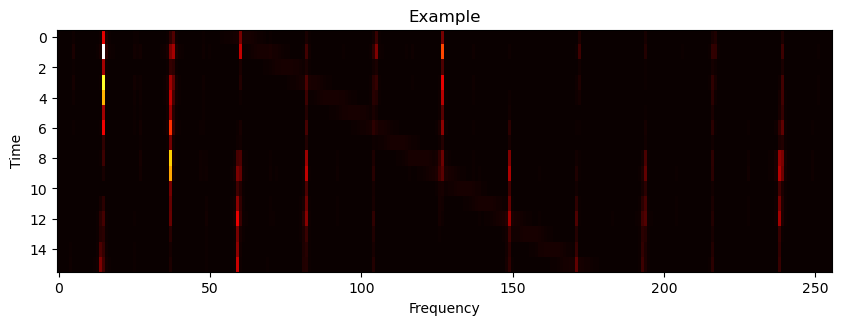

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
class_id = random.randint(0,100)
for i in range(class_id * num_samples_per_class, class_id * num_samples_per_class+5):
    plt.rcParams.update({'font.size': 10})
    plt.figure(figsize=(10,5))
    plt.title("Example")
    plt.xlabel("Frequency")
    plt.ylabel("Time")
    plt.imshow(injected[i, :, :], cmap='hot', aspect=5)

In [7]:
from sklearn.metrics import silhouette_score
features = []
for i in range(injected.shape[0]):
    features.append(injected[i,:,:].flatten())    
features = np.array(features)

print(features.shape)
print(labels[:,0].shape)
score = silhouette_score(X = feautres[:50_000,:], labels = labels[:50_000,0])
print(score)

(10000, 4096)
(10000,)


NameError: name 'feautres' is not defined